In [1]:
from pathlib import Path
import sys
sys.path.append(str(Path.cwd().parent))

In [2]:
from codes.utils import load_alpha_digits
import matplotlib.pyplot as plt
import numpy as np
from codes.RBM import RBM

# Alpha Digits Test RBM

(39, 320)


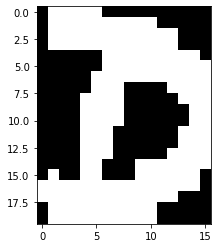

In [3]:
data = load_alpha_digits()
plt.imshow(data["dat"][13][0], cmap='gray')
d_letter = [data["dat"][13][i].flatten() for i in range(data["dat"][13].shape[0])]
d_letter = np.array(d_letter)   
print(d_letter.shape)

In [4]:
rbm = RBM(d_letter.shape[1], 20)

errors = rbm.train(d_letter, 10, num_epochs=1000, lr=0.1, verbose=False)

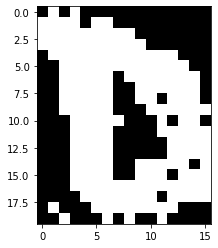

In [5]:
plt.imshow(rbm.generate_image(1,100, reshape=data["dat"][13][0].shape)[0], cmap='gray')

# Mnist Test RBM

(5421, 28, 28)


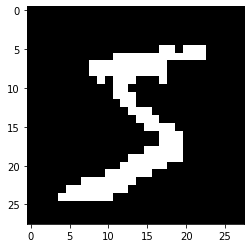

In [6]:
from codes.utils import load_mnist

train = load_mnist()
five_numbers = train[0][0][train[1][0]==5]
print(five_numbers.shape)
plt.imshow(five_numbers[0], cmap='gray')

In [7]:
five_numbers = [five_numbers[i].flatten() for i in range(five_numbers.shape[0])]
five_numbers = np.array(five_numbers)
print(five_numbers.shape)

(5421, 784)


In [8]:
rbm = RBM(28*28, 300)

errors = rbm.train(five_numbers, 128, num_epochs=1000, lr=0.1, verbose=False)

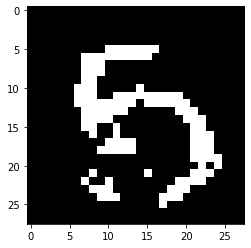

In [9]:
plt.imshow(rbm.generate_image(1, 100, reshape=(28,28))[0], cmap='gray')